<a href="https://colab.research.google.com/github/AbdallahAl-masri/ML-corona_project/blob/main/AI_project_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path = '/content/drive/My Drive'
os.chdir(path)

import pandas as pd
import numpy as np

data = pd.read_csv('corona_virus.csv', encoding='unicode_escape')
np.random.seed()
data.columns = data.columns.str.strip()
# Separate features and target variable
x = data[['Population', 'Total Deaths', 'Total Recovered', 'Total Tests', 'Active Cases', 'Tests/1M pop', 'Deaths/1M pop', 'TotCases/1M pop']]
y = data['Total Cases']


y= y.str.replace(',', '')
y = pd.to_numeric(y)

for i in x.columns:
  x[i] = x[i].str.replace(',', '')
  x[i] = pd.to_numeric(x[i])

MAES = []
algo = []
RMSE = []
MSE = []
#accuracy = []
#recall = []
#fscore = []

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-231-81643c7a4050>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].str.replace(',', '')
<ipython-input-231-81643c7a4050>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = pd.to_numeric(x[i])


In [ ]:
x = x.fillna(method='ffill',axis=0)
print(x.isnull().sum())
x.dtypes

Population         0
Total Deaths       0
Total Recovered    0
Total Tests        0
Active Cases       0
Tests/1M pop       0
Deaths/1M pop      0
TotCases/1M pop    0
dtype: int64


Population         float64
Total Deaths       float64
Total Recovered    float64
Total Tests        float64
Active Cases       float64
Tests/1M pop       float64
Deaths/1M pop      float64
TotCases/1M pop    float64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error



# Functions for comparing different approaches
def score_dataset_RandomForest(X_train, X_valid, y_train, y_valid, preprocessor):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)

    preds = model.predict(X_valid)

    algo.append('RandomForset')
    MAES.append(mean_absolute_error(y_valid, preds))
    MSE.append(mean_squared_error(y_valid, preds))
    mse = mean_absolute_error(y_valid, preds)
    RMSE.append(np.sqrt(mse))
    #accuracy.append(accuracy_score(preds, y_valid))
    #recall.append(recall_score(preds,y_valid))
    #fscore.append(f1_score(preds,y_valid))
    return mean_absolute_error(y_valid, preds)



def score_dataet_Logistic(X_train, X_valid, y_train, y_valid, preprocessor):


  model = LogisticRegression()
  model.fit(X_train, y_train)



  # preprocessing of validation data, get predictions
  preds = model.predict(X_valid)
  algo.append('Logistic')
  MSE.append(mean_squared_error(y_valid, preds))
  mse = mean_absolute_error(y_valid, preds)
  MAES.append(mean_absolute_error(y_valid, preds))
  RMSE.append(np.sqrt(mse))
  #accuracy.append(accuracy_score(preds, y_valid))
  #recall.append(recall_score(preds,y_valid))
  #fscore.append(f1_score(preds,y_valid))
  return mean_absolute_error(y_valid, preds)



In [ ]:
from sklearn.model_selection import train_test_split

def score_dataet_SVC(X_train, X_valid, y_train, y_valid, preprocessor):


  model = SVC()
  model.fit(X_train, y_train)



  # preprocessing of validation data, get predictions
  preds = model.predict(X_valid)
  algo.append('SVC')
  MSE.append(mean_squared_error(y_valid, preds))
  mse = mean_absolute_error(y_valid, preds)
  MAES.append(mean_absolute_error(y_valid, preds))
  RMSE.append(np.sqrt(mse))
  #accuracy.append(accuracy_score(preds, y_valid))
  #recall.append(recall_score(preds,y_valid))
  #fscore.append(f1_score(preds,y_valid))
  return mean_absolute_error(y_valid, preds)

In [ ]:
# Split the data into training and testing sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]


# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [ ]:
from sklearn import preprocessing
from pandas.core.arrays import categorical
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# preprocessing for numerical data
numerical_transform = SimpleImputer()

# preprocessing for categorical data
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, numerical_cols),
        ('cat', categorical_transform, low_cardinality_cols)
    ])


In [ ]:
print('MAE from pipeline - RandomForset')
print(score_dataset_RandomForest(X_train, X_valid, y_train, y_valid, preprocessor))
print('\n\nMAE from pipeline - Logistic')
print(score_dataet_Logistic(X_train, X_valid, y_train, y_valid, preprocessor))

MAE from pipeline - RandomForset
16025175.255319148


MAE from pipeline - Logistic
18211354.425531916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBRegressor



my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)],
             verbose=False)

preds = my_model.predict(X_valid)
algo.append('XGBRegressorr')
MAES.append(mean_absolute_error(preds, y_valid))
mse = mean_absolute_error(y_valid, preds)
RMSE.append(np.sqrt(mse))
MSE.append(mean_squared_error(y_valid, preds))
#accuracy.append(accuracy_score(preds, y_valid))
#recall.append(recall_score(preds,y_valid))
#fscore.append(f1_score(preds,y_valid))
print("Mean Absolute Error: " + str(mean_absolute_error(preds, y_valid)))




/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error: 12863402.653678732


In [ ]:
print('MAE from SVC')
print(score_dataet_SVC(X_train_full, X_valid_full, y_train, y_valid, preprocessor))

MAE from SVC
15156560.425531914


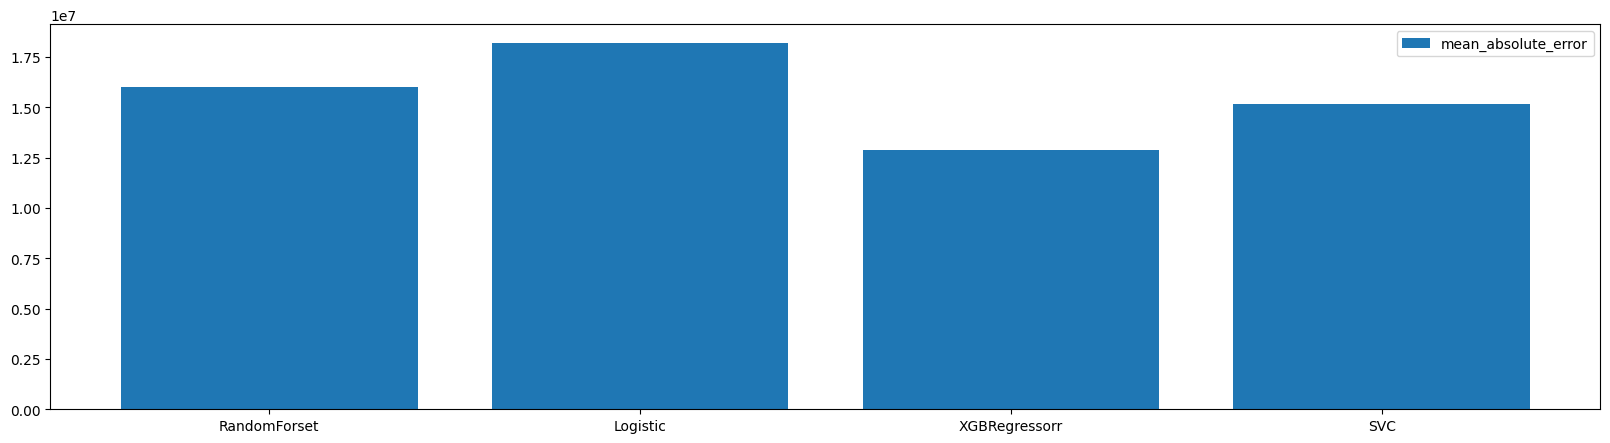

In [ ]:
import matplotlib.pyplot as plt
finalResult=pd.DataFrame({'Algorithm' : algo, 'MAE' : MAES, 'RMSE' : RMSE, 'MSE' : MSE})
fig,ax=plt.subplots(figsize=(20,5))
plt.bar(finalResult.Algorithm,MAES,label='mean_absolute_error')
plt.legend()
plt.show()


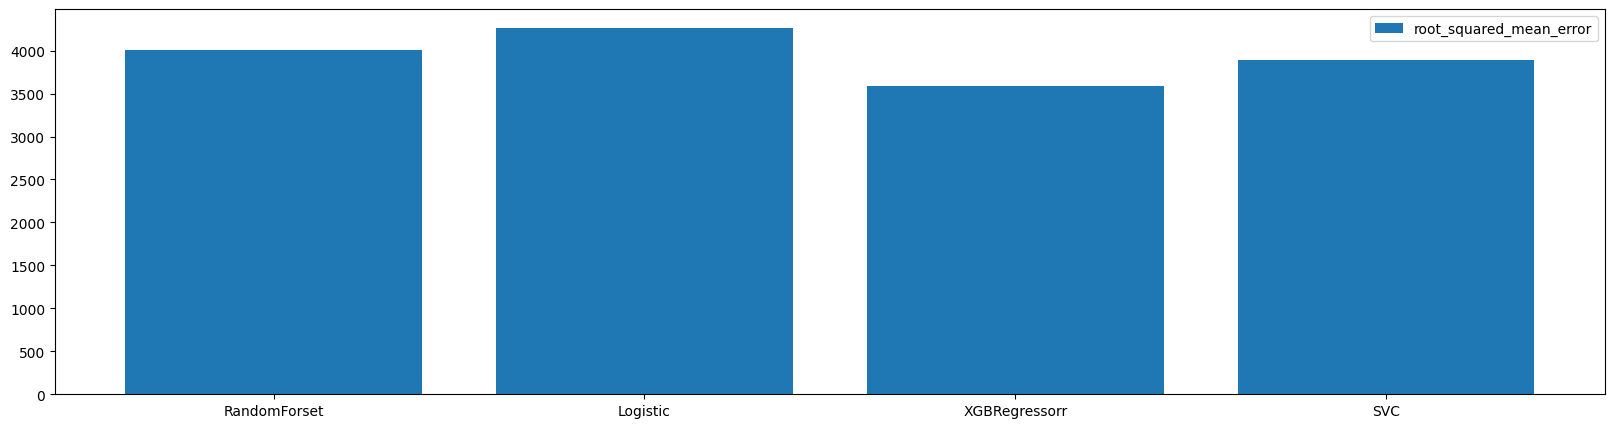

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.bar(finalResult.Algorithm,RMSE,label='root_squared_mean_error')
plt.legend()
plt.show()

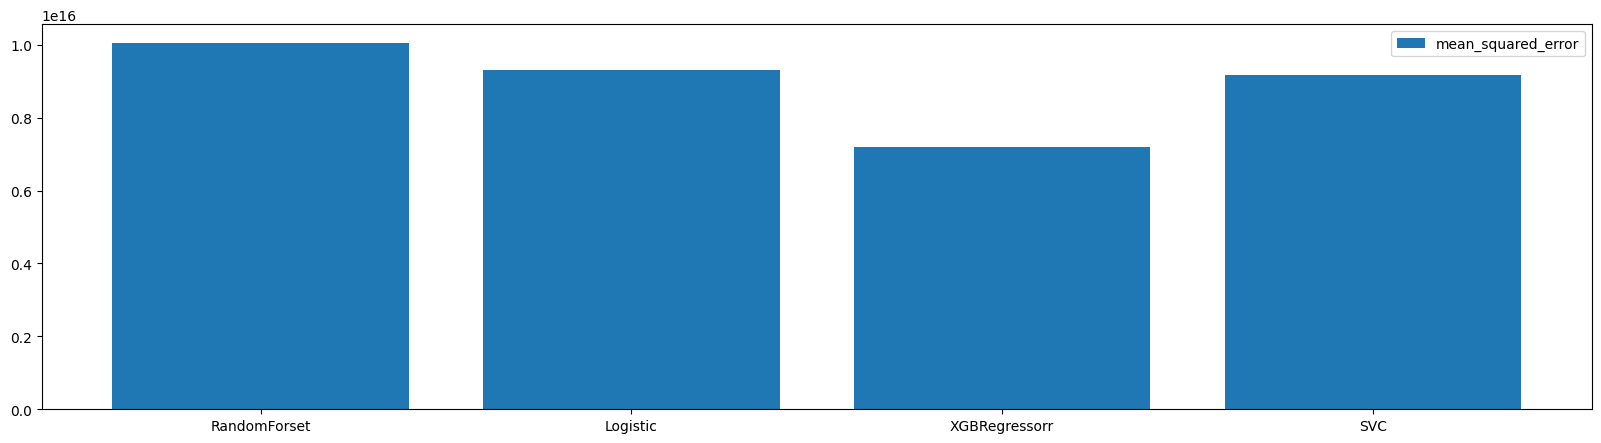

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.bar(finalResult.Algorithm,MSE,label='mean_squared_error')
plt.legend()
plt.show()

In [ ]:
best = {algo[MSE.index(min(MSE))] : min(MSE), algo[MAES.index(min(MAES))] : min(MAES), algo[RMSE.index(min(RMSE))] : min(MAES)}

print(algo[MSE.index(min(MSE))], min(MSE), MSE.index(min(MSE)))
print(algo[MAES.index(min(MAES))],min(MAES), MAES.index(min(MAES)))
print(algo[RMSE.index(min(RMSE))],min(MAES), RMSE.index(min(RMSE)))

print('\nthe best model is:', min(best, key=best.get))

XGBRegressorr 7201219388544422.0 2
XGBRegressorr 12863402.653678732 2
XGBRegressorr 12863402.653678732 2

the best model is: XGBRegressorr
